In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model

In [2]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224 
ns = 0.965
tau = 0.054

In [3]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, mnu=0.06, omk=0)
pars.InitPower.set_params(As=2.1e-9, ns=ns)

# Imponemos un l máximo
lmax = 2500
pars.set_for_lmax(lmax, lens_potential_accuracy=1)

# Corremos CAMB
results = camb.get_results(pars)

# Obtenemos Cl's
cls = results.get_total_cls(lmax=lmax, CMB_unit='muK', raw_cl=True)

# Construimos arrays de l y D_l = l(l+1)C_l/(2π)
ells = np.arange(cls.shape[0])
Dl_TT = ells * (ells + 1) * cls[:, 0] / (2 * np.pi)

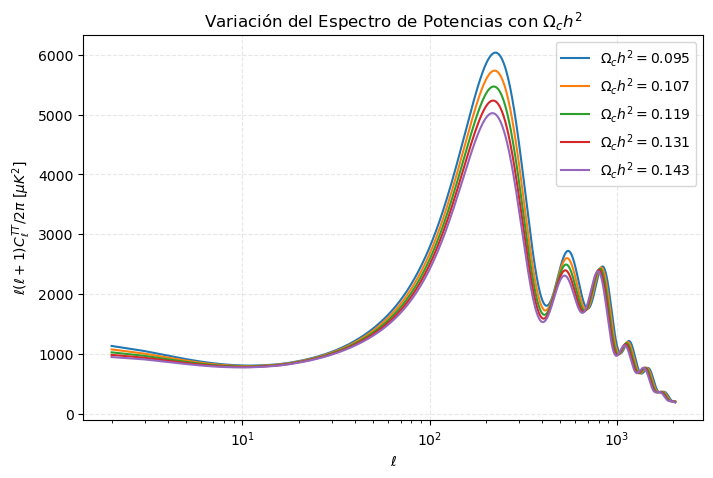

In [5]:
def get_cls(ombh2, omch2, H0=67.5, ns=0.965, As=2.1e-9):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0)
    pars.InitPower.set_params(As=As, ns=ns)
    pars.set_for_lmax(2000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    cls = results.get_total_cls(CMB_unit='muK', raw_cl=True)
    ells = np.arange(cls.shape[0])
    Dl_TT = ells*(ells+1)*cls[:,0]/(2*np.pi)
    return ells, Dl_TT

# valores fijos para bariones
ombh2 = 0.022
# variamos omch2 
omch2_values = [0.095, 0.107, 0.119, 0.131, 0.143]

plt.figure(figsize=(8,5))
for omch2 in omch2_values:
    ells, Dl_TT = get_cls(ombh2, omch2)
    label = r'$\Omega_c h^2 = %.3f$' % omch2
    plt.plot(ells[2:], Dl_TT[2:], label=label)

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/2\pi\ [\mu K^2]$')
plt.xscale('log')
plt.legend()
plt.title('Variación del Espectro de Potencias con $\Omega_c h^2$')
plt.grid(True, ls='--', alpha=0.3)
plt.show()

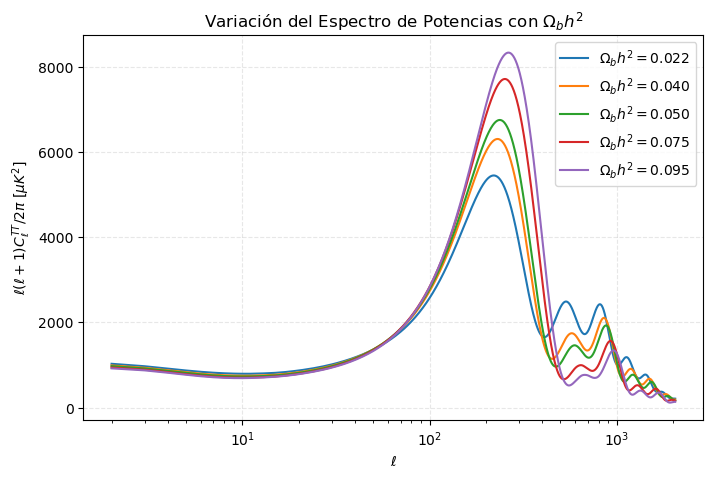

In [14]:
def get_cls(ombh2, omch2, H0=67.5, ns=0.965, As=2.1e-9):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0)
    pars.InitPower.set_params(As=As, ns=ns)
    pars.set_for_lmax(2000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    cls = results.get_total_cls(CMB_unit='muK', raw_cl=True)
    ells = np.arange(cls.shape[0])
    Dl_TT = ells*(ells+1)*cls[:,0]/(2*np.pi)
    return ells, Dl_TT

# valores fijos para bariones
ombh2_values = [0.022, 0.04, 0.05,0.075,0.095]
# variamos omch2 
omch2 =0.120

plt.figure(figsize=(8,5))
for ombh2 in ombh2_values:
    ells, Dl_TT = get_cls(ombh2, omch2)
    label = r'$\Omega_b h^2 = %.3f$' % ombh2
    plt.plot(ells[2:], Dl_TT[2:], label=label)

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/2\pi\ [\mu K^2]$')
plt.xscale('log')
plt.legend()
plt.title('Variación del Espectro de Potencias con $\Omega_b h^2$')
plt.grid(True, ls='--', alpha=0.3)
plt.show()

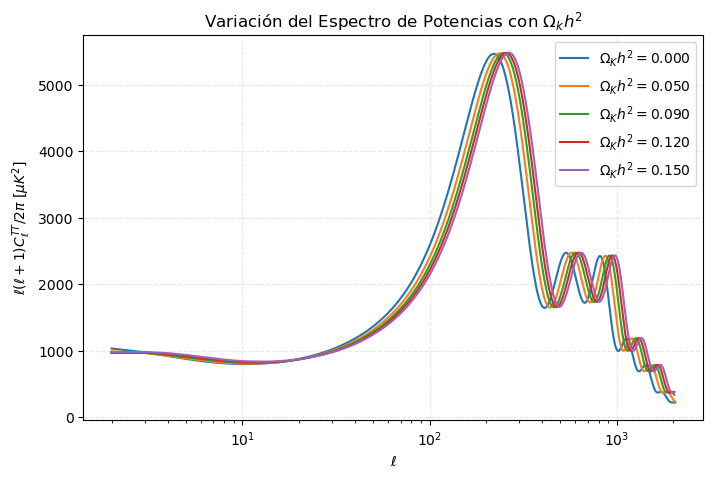

In [29]:
def get_cls(omk,ombh2= 0.0224 , omch2=0.120, H0=67.5, ns=0.965, As=2.1e-9):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=omk)
    pars.InitPower.set_params(As=As, ns=ns)
    pars.set_for_lmax(2000, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    cls = results.get_total_cls(CMB_unit='muK', raw_cl=True)
    ells = np.arange(cls.shape[0])
    Dl_TT = ells*(ells+1)*cls[:,0]/(2*np.pi)
    return ells, Dl_TT

# valores fijos para bariones
omk_values = [0.0, 0.05,0.09,0.12,0.15]
# variamos omch2 

plt.figure(figsize=(8,5))
for omk in omk_values:
    ells, Dl_TT = get_cls(omk)
    label = r'$\Omega_K h^2 = %.3f$' % omk
    plt.plot(ells[2:], Dl_TT[2:], label=label)

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/2\pi\ [\mu K^2]$')
plt.xscale('log')
plt.legend()
plt.title('Variación del Espectro de Potencias con $\Omega_k h^2$')
plt.grid(True, ls='--', alpha=0.3)
plt.show()